### Linear Regression Simulation Experiments

Let's generate some data using $y = \theta^T x + N(0, \sigma^2)$.

In [1]:
from numpy import *
from matplotlib.pyplot import *
import scipy.stats

def plot_line(theta, x_min, x_max, color, label):
    x_grid_raw = arange(x_min, x_max, 0.01)
    x_grid = vstack((    ones_like(x_grid_raw),
                         x_grid_raw,
                    ))
    y_grid = dot(theta, x_grid)
    plot(x_grid[1,:], y_grid, color, label=label)


def gen_lin_data_1d(theta, N, sigma):

    #####################################################
    # Actual data
    x_raw = 100*(random.random((N))-.5)
    
    x = vstack((    ones_like(x_raw),
                    x_raw,
                    ))
                
    y = dot(theta, x) + scipy.stats.norm.rvs(scale= sigma,size=N)
    
    
    plot(x[1,:], y, "ro", label = "Training set")
    #####################################################
    # Actual generating process
    #
    plot_line(theta, -70, 70, "b", "Actual generating process")
    
    
    #######################################################
    # Least squares solution
    #
    
    theta_hat = dot(linalg.inv(dot(x, x.T)), dot(x, y.T))
    plot_line(theta_hat, -70, 70, "g", "Maximum Likelihood Solution")
    

    legend(loc = 1)
    xlim([-70, 70])
    ylim([-100, 100])

In [2]:
%matplotlib inline
theta = array([-3, 1.5])
N = 10
sigma = 20.2

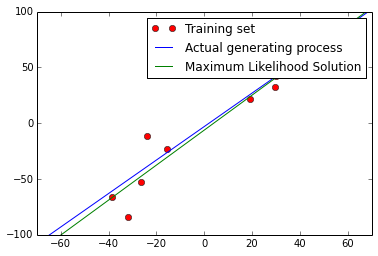

In [3]:
gen_lin_data_1d(theta, N, sigma)

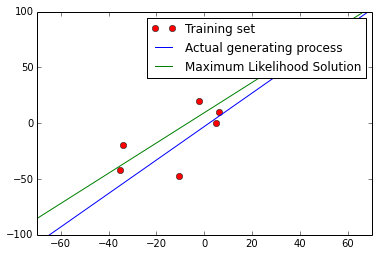

In [4]:
gen_lin_data_1d(theta, N, sigma)

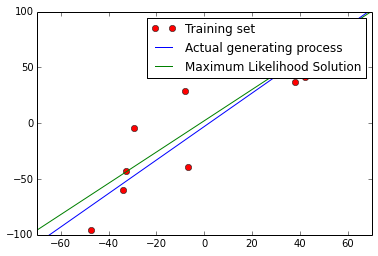

In [5]:
gen_lin_data_1d(theta, N, sigma)

As you can see, the Maximum Likelihood solution (aka the Least Squares solution) will be different every time.

Now, let's see what happens when the $\sigma^2$ is very large:

In [6]:
theta = array([-3, 1.5])
N = 10
sigma = 120.2

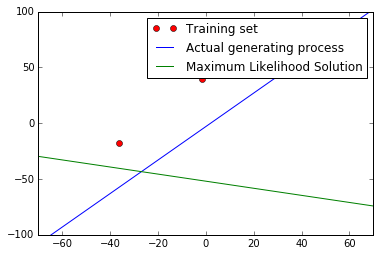

In [7]:
gen_lin_data_1d(theta, N, sigma)

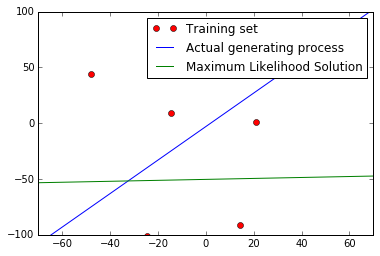

In [8]:
gen_lin_data_1d(theta, N, sigma)

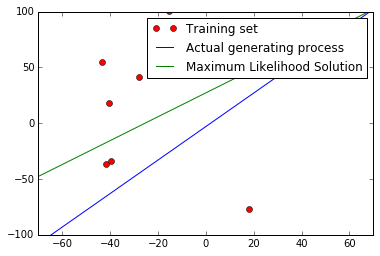

In [9]:
gen_lin_data_1d(theta, N, sigma)

The solution can be very far away from the actual generating process. This will substantially decrease the test likelihood (increase the test error.)

We can fix this if we increase N

In [10]:
theta = array([-3, 1.5])
N = 100
sigma = 120.2

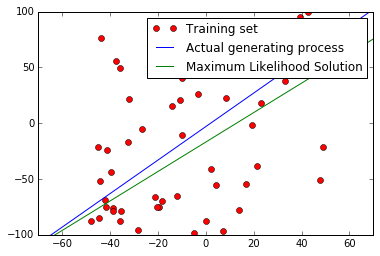

In [11]:
gen_lin_data_1d(theta, N, sigma)

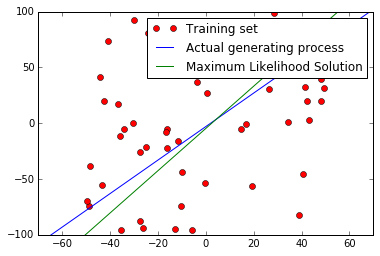

In [12]:
gen_lin_data_1d(theta, N, sigma)

### The magnitude of the coefficients as an indication of overfitting

Let's try an experiment: generate data points, and fit a $\theta$. If the true $\theta$ is small-ish, then in general we will overestimate its magnitude.

In [13]:
def compare_theta_theta_hat(N, ndim, sigma_theta, sigma):
    theta = scipy.stats.norm.rvs(scale=sigma_theta,size=ndim+1)
    
    x_raw = 100*(random.random((N, ndim))-.5)
    
    x = hstack((    ones((N, 1)),
                    x_raw,
                    ))
                
    y = dot(x, theta) + scipy.stats.norm.rvs(scale= sigma,size=N)
    
    
    theta_hat = dot(linalg.pinv(dot(x.T, x)), dot(x.T, y))
    
    return theta[1], theta_hat[1]

In [14]:
N = 10
ndim = 5
sigma_theta = 1
sigma = 100

In [15]:
compare_theta_theta_hat(N, ndim, sigma_theta, sigma) 

(0.32968922348457841, -2.6007613728264438)

In [16]:
compare_theta_theta_hat(N, ndim, sigma_theta, sigma)  

(0.19494420968828235, 1.263294254668331)

In [17]:
compare_theta_theta_hat(N, ndim, sigma_theta, sigma) 

(1.3894750256536736, 6.4783304381666635)

In [18]:
compare_theta_theta_hat(N, ndim, sigma_theta, sigma) 

(-0.44502106389239426, -1.4849140682912148)

There is overfitting: if there weren't overfitting, we would not be systematically getting larger magnitudes for $\hat{\theta}_1$

N = 1000
ndim = 5
sigma_theta = 1
sigma = 100

In [19]:
compare_theta_theta_hat(N, ndim, sigma_theta, sigma) 

(-1.1833775601489724, 3.0628772648894271)

In [20]:
compare_theta_theta_hat(N, ndim, sigma_theta, sigma) 

(0.18350521708576811, -4.7498116712053378)

In [21]:
compare_theta_theta_hat(N, ndim, sigma_theta, sigma) 

(0.25622461004237274, -2.3578648254444459)

With a larger N, we are not overfitting as much.

For every dimension of $\theta$, there is a chance of a lot of overfitting. If we have lots of dimensions, there is an increased chance of overfitting really badly

In [22]:
def compare_theta_theta_hat_Linf(N, ndim, sigma_theta, sigma):
    theta = scipy.stats.norm.rvs(scale=sigma_theta,size=ndim+1)
    
    x_raw = 100*(random.random((N, ndim))-.5)
    
    x = hstack((    ones((N, 1)),
                    x_raw,
                    ))
                
    y = dot(x, theta) + scipy.stats.norm.rvs(scale= sigma,size=N)
    
    
    theta_hat = dot(linalg.pinv(dot(x.T, x)), dot(x.T, y))
    
    return max(theta), max(theta_hat)

In [23]:
N = 100
ndim = 50
sigma_theta = 1
sigma = 100
compare_theta_theta_hat_Linf(N, ndim, sigma_theta, sigma)

(1.6484436575435313, 32.217429485235336)

In [24]:
compare_theta_theta_hat_Linf(N, ndim, sigma_theta, sigma)

(2.5743079770873196, 13.274256131200596)

In [25]:
compare_theta_theta_hat_Linf(N, ndim, sigma_theta, sigma)

(1.9004612299177268, 5.2233432356286835)

In [26]:
compare_theta_theta_hat_Linf(N, ndim, sigma_theta, sigma)

(2.1954309632409434, 20.124153029193067)

In [27]:
compare_theta_theta_hat_Linf(N, ndim, sigma_theta, sigma)

(2.3584164763495186, 2.6672059730981106)

In [28]:
compare_theta_theta_hat_Linf(N, ndim, sigma_theta, sigma)

(4.0618106925075299, 3.7817703395917412)